<a href="https://colab.research.google.com/github/ColeAnderson2002/assignment4/blob/main/ColeAndersonAssignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?
  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?
  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

In [249]:
import numpy as  np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## LOADING THE PACKAGES NEEDED

<Axes: >

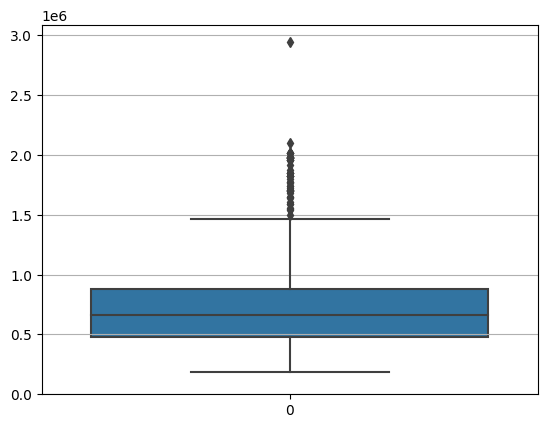

In [250]:
# QUESTION 1.1

df = pd.read_csv('/content/cars_hw.csv') ## Loading the data
df.head()
# df.describe

## Logically, "price" is likely to have outliers, and looking at headed data
## 1)detect outliers, 2)create outlier dummy, 3)windorize function (model_eval.ipynb)

df['Price'].hist(bins=20) ##Ooutlier around 3.0
sns.boxplot(df.Price)


## The code below this line was to add a new column and switch "Make_Year" to
## "Age," inspired by one of the lectures. I'm not using it anymore but keeping

#df['age'] = max(df['Make_Year'])-df['Make_Year'] # Convert year to age
# df ['age'].hist(bins=20)
# print(df.columns) ## AGE HAS BEEN ADDED
# sns.scatterplot(data=df,y='Price',x='age') ## Outlier up by 3.0

In [251]:
# QUESTION 1.1 - cont'd

def windsorize(x):
    # Compute IQR and 1st,3rd quantiles
    pct1, pct3 = np.percentile(x,[25,75])
    iqr = pct3 - pct1

    # Compute whiskers:
    lower_whisker=pct1-iqr*1.5
    upper_whisker=pct3+iqr*1.5

    # Compute outlier dummy:
    x_outlier = (x < lower_whisker) + (x > upper_whisker)

    # Windsorize x:
    x_windsor = x
    x_windsor[x < lower_whisker] = lower_whisker
    x_windsor[x > upper_whisker] = upper_whisker
    return({'x_windsor':x_windsor,
            'x_outlier':x_outlier,
            'lower_whisker':lower_whisker,
            'upper_whisker':upper_whisker})

windsorize(df.Price)

## the original outlier I found in 'Price' has been replace
## values outside the whiskers with the min/max values of the whiskers


<ipython-input-251-fa3bb74b8360>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[x < lower_whisker] = lower_whisker
<ipython-input-251-fa3bb74b8360>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_windsor[x > upper_whisker] = upper_whisker


{'x_windsor': 0       657000
 1       682000
 2       793000
 3       414000
 4       515000
         ...   
 971     956000
 972    1027000
 973     736000
 974     749000
 975     691000
 Name: Price, Length: 976, dtype: int64,
 'x_outlier': 0      False
 1      False
 2      False
 3      False
 4      False
        ...  
 971    False
 972    False
 973    False
 974    False
 975    False
 Name: Price, Length: 976, dtype: bool,
 'lower_whisker': -135125.0,
 'upper_whisker': 1493875.0}

<ipython-input-252-afe6e8a6504c>:7: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=df, x='Price', hue='Make', fill=False)


<Axes: xlabel='Price', ylabel='Density'>

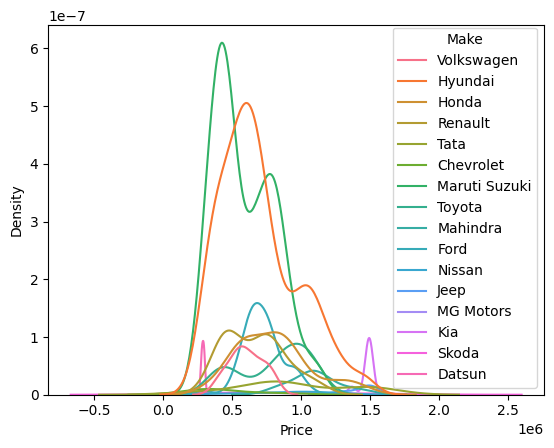

In [252]:
# QUESTION 1.2

# summary_price = df['Price'].describe()
# print(summary_price)

prices = df['Price'].groupby(df['Make']).describe()
sns.kdeplot(data=df, x='Price', hue='Make', fill=False)
# print(prices)

## KIA, MG Motors, and Jeep seemed to be the most expensive makes.
## Prices "in general" are pretty broad, in that their is a whie range of them
## which I understood from "print(prices)"

In [253]:
# QUESTION 1.3 - Splitting

from sklearn.model_selection import train_test_split

X=df.drop('Price', axis=1) # all columns except Price
y=df['Price'] # my target variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

## Last line is the actual splitting, where .2 has 20% in the test set, and the latter 80% into training

In [254]:
# QUESTION 1.4 - Regression

# numeric_vars = df.select_dtypes(include=['int64', 'float64']).columns
# print("Numeric Variables:")
# print(numeric_vars)
# Numeric Variables: 'Make_Year', 'Mileage_Run', 'Seating_Capacity', 'Price'

# categorical_vars = df.select_dtypes(include=['object']).columns
# print("\nCategorical Variables:")
# print(categorical_vars)
## Categorical Variables: 'Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type'

## Model 1 - Numeric Variable

from sklearn.linear_model import LinearRegression # loading needed packages
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelBinarizer


def pn(x):
    print(x,'\n')

y = df['Price'] ## Price here because we are trying to predict the price!
n_variables = ['Make_Year', 'Mileage_Run', 'Seating_Capacity']

X = df.loc[:,n_variables] # Construct data matrix

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

reg = LinearRegression().fit(X, y) # Fit the linear model

# pn(reg.intercept_) # Intercept value
# pn(reg.coef_) # Regression coefficients
pn(reg.score(X, y)) # R squared measure (which is what I am looking for)

# prediction = reg.predict(X_test)
# pn(np.sqrt(mean_squared_error(y, prediction)))

## Make Predictions on the Test Set
predictions = reg.predict(X_test)
pn(np.sqrt(mean_squared_error(y_test, predictions)))

## R^2 --> 0.353
## RMSE --> 248989.1831760394

# print(X_train.info())


0.3528733014384404 

248989.1831760394 



In [255]:
# QUESTION 1.4 - Model 2 - Categorical

y = df['Price'] # again, I am trying to predict price
c_variables = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']

df0 = pd.get_dummies(df, columns=c_variables) #new data set to save old one; referenced https://stackoverflow.com/questions/38541636/keep-other-variables-when-executing-get-dummies-in-pandas for this, but it honestly was a little confusing
old_columns= ['Price','Make_Year', 'Mileage_Run', 'Seating_Capacity'] # these are the old numeric values, now I am just trying for cateogrical

df1=df0.drop(columns=old_columns) # drops original numeric columns and price from df0

X_train, X_test, y_train, y_test = train_test_split(df1,y,test_size=.2,random_state=100)

reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
pn(reg.score(df1, y)) # R squared measure (which is what I am looking for)

## Make Predictions on the Test Set
predictions = reg.predict(X_test)
pn(np.sqrt(mean_squared_error(y_test, predictions)))

## R^2 = 0.726
## RMSE = 173507.54692334338 ## I am a little confused as to why these are such big values. Is it because it relates to Price, which is a high number...


0.727969533178604 

161250.2740296088 



Conclusion between models one and two: Model two "performs better" as it has a lower RMSE (which are both pretty high) and has a higher R^2 value, meaning more accuracy is present.



In [295]:
# QUESTION 1.4 - Model 3 - Combined Regressor

df2 = pd.concat([df0, df1],axis=1)

df3 = df2

X_train, X_test, y_train, y_test = train_test_split(df2,y,test_size=.2,random_state=100)

reg = LinearRegression().fit(X_train, y_train) # Fit the linear model
pn(reg.score(df3, y)) # R squared measure (which is what I am looking for) #1.0

predictions = reg.predict(X_test)
pn(np.sqrt(mean_squared_error(y_test, predictions))) # very very low number

## R^2 = 1.0 --> this means that there is perfect fit.

## RMSE = 1.9428027515126785e-10

# This combined model performs better than the last two models

1.0 

1.9428027515126785e-10 



In [262]:
# QUESTION 1.5

from sklearn.preprocessing import PolynomialFeatures

expander = PolynomialFeatures(degree=2,include_bias=False) # Create the expander
Z_train = expander.fit_transform(df2) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out() # Get the names of these variables
zdf = pd.DataFrame(data=Z_train, columns = names) # Create a new, expanded dataframe

X_train, X_test, y_train, y_test = train_test_split(zdf,y,test_size=.2,random_state=100)

reg = LinearRegression().fit(X_train, y_train)

pn(reg.score(zdf, y)) ## R^2 value

predictions = reg.predict(X_test)
pn(np.sqrt(mean_squared_error(y_test, predictions)))

## R^2 value: 0.9999999994314855
## RMSE is now 16.560817587198038

## FINDINGS: It is worse than my model from the previous question!

0.9999999994314855 

16.560817587198038 



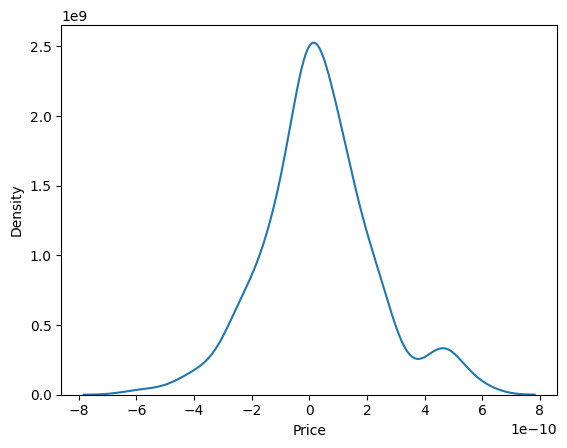

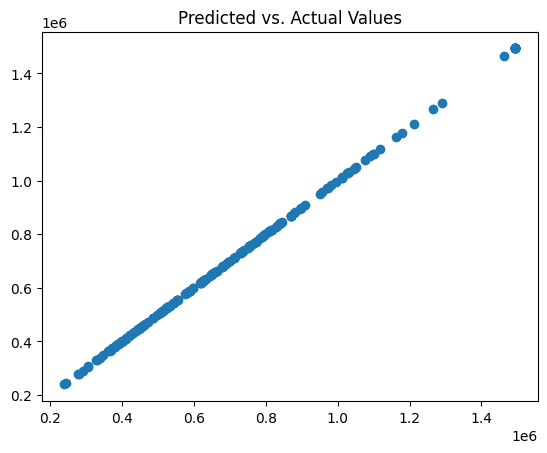

In [268]:
# QUESTION 1.6

X_train, X_test, y_train, y_test = train_test_split(df2,y,test_size=.2,random_state=100)

reg = LinearRegression().fit(X_train, y_train) # Fit the linear model

# Predicted values (model_evaluation):
y_hat_lm = reg.predict(X_test)
residuals_lm = y_test - y_hat_lm

## Residual plot:
sns.kdeplot(residuals_lm)
plt.show()

## FINDING: The residual is bell shaped (more or less, with a little bump)
## around zero. The little bump must mean that there is some sort of error in
## range. The strengths frmo this are that it is centered around zero, meaning
## that it is generally accurate of a model to predict. Weak though because
## of that bump.

## True versus predicted plot:
plt.scatter(x=y_hat_lm,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()

## FINDING: There is a roughly diagonal following meaning that the predictions
## from the model are pretty accurate! It is strong in the notion that it is
## diagonal, meaning that there is pretty minimal unaccuracy. It is weak though
## as it is not perfectly diagonal (even though this is pretty debatable).



In [ ]:
# QUESTION 1.7

from sklearn import tree # Import the tree classifier

X_train, X_test, y_train, y_test = train_test_split(df2,y,test_size=.2,random_state=100)

# Fit decision tree: DEPTH 1

for n in range(1,10):
  cart = tree.DecisionTreeRegressor(max_depth=n) # Create a classifier object
  cart = cart.fit(X_train, y_train) # Fit the classifier
  predictions = cart.predict(X_test)
  pn(f'For depth {n}: R^2 = {cart.score(X_test, y_test)}, RMSE = {np.sqrt(mean_squared_error(y_test, predictions))}')

# # Visualize results:
# tree.plot_tree(cart,filled=True)

# # Makig predictions
# y_hat = cart.predict(X_test)


# Findings: Depth 8 gives the best result, as the R^2 is the closest to 1!

# For depth 1: R^2 = 0.6449355466873457, RMSE = 185517.0143025623

# For depth 2: R^2 = 0.9271329892967226, RMSE = 84041.85407893837

# For depth 3: R^2 = 0.9819986383341721, RMSE = 41771.76508698427

# For depth 4: R^2 = 0.99533315660842, RMSE = 21268.739982371353

# For depth 5: R^2 = 0.9987026596525489, RMSE = 11213.911148907531

# For depth 6: R^2 = 0.9994094239652828, RMSE = 7566.029983739558

# For depth 7: R^2 = 0.9995718325819962, RMSE = 6442.240833944569

# For depth 8: R^2 = 0.9999310886986433, RMSE = 2584.4930818841394

# For depth 9: R^2 = 0.9997125065983229, RMSE = 5278.907949020117


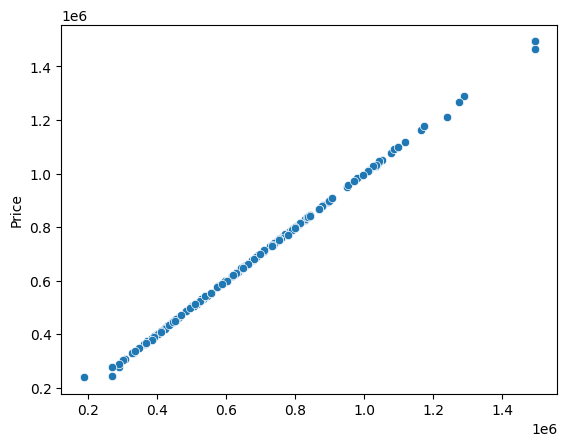

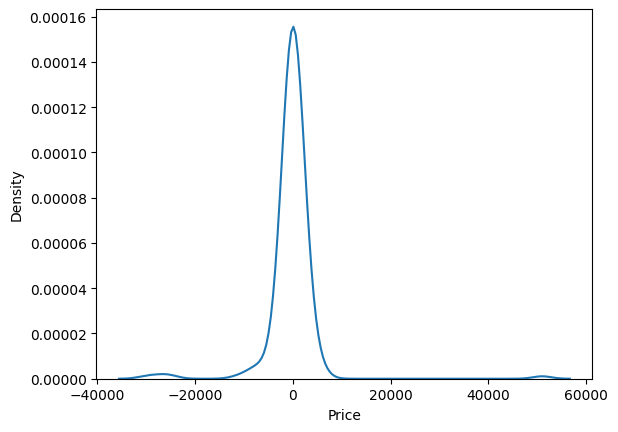

In [298]:
# QUESTION 1.8

cart = tree.DecisionTreeRegressor(max_depth=8).fit(X_train, y_train)
predictions = cart.predict(X_test)
sns.scatterplot(x = predictions, y = y_test)
plt.show()


residuals = y_test - predictions

sns.kdeplot(residuals)
plt.show()

## To answer the questions, the predicted values do diagonally align. With the
## Kernel Density Plot, it is pretty bell-shaped as well, around zero!

In [ ]:
## Question 1.9

## Based on the models I have created, it seems like lthe linear model gets the
## better performance award on the test set. The combined one specifically had a
## very low RMSE value, and the R^2 was awfully close to one in all three
## versions (the categorical, numerical, and combined)—one could say it was the
## Swiss Army Knife of models.

**Q2.** The is a question about regression using decision trees and linear models. The data include wages at data science-y jobs, including

  - `Rating`: Company worker happiness score
  - `Size`: Number of employees
  - `Sector`: Part of the economy
  - `avg_salary`: Average wage
  - `job_state`: Location of work

  1. Load the `wages_hw.csv` file. Split the sample into an ~80% training set and a ~20% test set. Do any necessary cleaning, including outliers and missings.
  2. Use a linear model to regress `avg_salary` on `Sector`. Which sectors have the highest predicted wages? What is the $R^2$ and `RMSE` on the test set?
  3. Make a scatterplot of `avg_salary` and `Rating`. Is there an obvious visual relationship between the two variables? Regress `avg_salary` on `Rating` as a numeric variable: Do higher ratings predict higher or lower wages? Convert `Rating` to a one-hot encoded variable, with a category for each rating. Run a regression of `avg_salary` on the categorical version. How do your results change? Explain. Which version has a higher $R^2$ and lower `RMSE`?
  4. Now interact `Sector` with the categorical version of `Rating`, so your regressors are a (Sector, Rating) pair; this is a programming puzzle you'll have to think about, but using the `.PolynomialFeatures()` function on the one-hot encoded categorical variables is one option, and another is pre-processing a new variable that interacts `Sector` and `Rating` and then one-hot encoding the result. Regress `avg_salary` on the (Sector, Rating) pairs. How does the $R^2$ and `RMSE` on the test set compare to part 2? Interpret the coefficients; which sector-rating pairs have the highest wages?
  5. Run a linear regression of `avg_salary` on all the variables. What is the $R^2$ on the test set? How does it compare to your simpler models in 2--4?
  6. Build a decision tree by regressing `avg_salary` on `Sector`, `Rating`, and the (Sector, Rating) pairs. What are the $R^2$ and `RMSE` of your models on the test set? How do your answers compare to parts 2, 3, and 4?
  7. Build a decision tree by regressing `avg_salary` on all the other variables. What is the $R^2$ and `RMSE` on the test set?
  8. Build a linear regression or decision tree using the available variables based on your own judgment. What degrees of freedom are you giving the model to predict variation in wages across company and location attributes? What is the $R^2$ and `RMSE` of your model? How does it compare to the previous ones in the question? Why does yours perform better or worse on the test set?

**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high
    - Husband's education (categorical) 1=low, 2, 3, 4=high
    - Number of children ever born (numerical)
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?
  2. Split the sample into ~80% training data and ~20% testing data.
  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.
  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?
  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.
  7. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

In [ ]:
# QUESTION 3.1

con_df = pd.read_csv('/content/contraception_hw.csv') ## Loading the data from contraception csv file
# df.head()

con_df=con_df.drop('Unnamed: 0', axis=1) # dropping the unnamed

print(con_df['method'].value_counts()) # 1 - none ; 2 - Long term ; 3 - Short term

print(pd.crosstab(con_df['method'], con_df['numberChildren']))

## Findings: it seems that couples who don't use contraception (method 1) have
## higher number of children in comparison to those who use some sort of
## contraception (Methods 2 and 3), and method 1 is more distributed towards
## having a less number of children in their families. From this, I'd argue that
## using methods 2 and 3 (contraception) means that you'll have less children.
## It's important to keep in mind this is a very specific survey on a small pool
## , thus this is just an assumption/evaluation that doesn't speak on a larger
## level.


1    629
3    511
2    333
Name: method, dtype: int64
numberChildren  0    1    2    3   4   5   6   7   8   9   10  11  12  13  16
method                                                                       
1               95  143  114   70  57  44  35  18  29   5   9   6   4   0   0
2                0   46   56   70  62  36  27  19   9   3   2   2   0   1   0
3                2   87  106  119  78  55  30  12   9   8   0   3   0   1   1


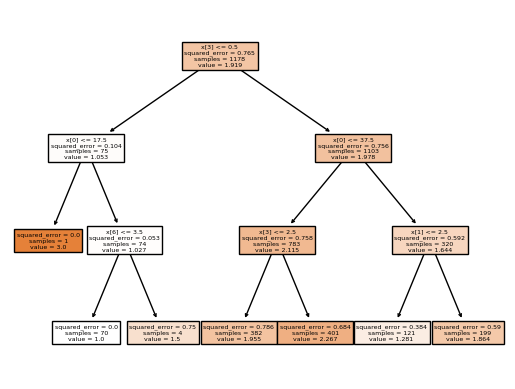

In [ ]:
# QUESTION 3.2 and 3.3
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

con_y=con_df['method']
con_x=con_df.drop(['method'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(con_x,y,test_size=.2,random_state=100)

tree_model = tree.DecisionTreeRegressor(max_depth=3) # cannot see nodes when higher depth max

tree_plot = tree_model.fit(X_train, y_train)

tree.plot_tree(tree_plot, filled = True)

plt.show()

## I am unable to see the nodes of the tree, but when I diminish the max depth
## to =1, I can. I am provided with SSE, samples, and values. From what I
## understand and have found online at https://www.complexica.com/narrow-ai-glos
## sary/classification-regression-trees#:~:text=Classification%20trees%20and%20r
## egression%20trees,the%20output%20variable%20is%20continuous.
## a classification tree would be better for this scenario as we are looking
## at categorical instances of contraception methods (if any). Regression trees,
## which is what I used, are for "continuous" variables, which is the reason why
## this all went wrong. I am essentially just seeing non-meaningful numbers with
## this regression tree.

In [ ]:
# con_df.head()

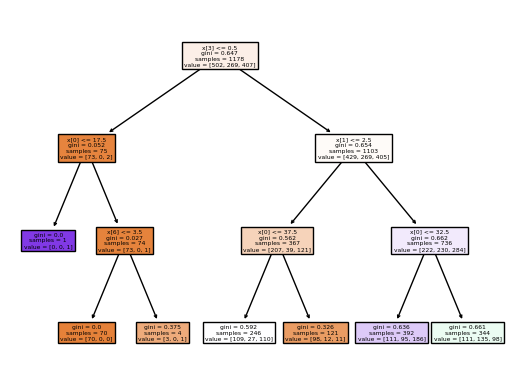

In [ ]:
# QUESTION 3.4

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

con_y = con_df['method']
con_x = con_df.drop(['method'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(con_x, con_y, test_size=0.2, random_state=100)

tree_model = DecisionTreeClassifier(max_depth=3)

tree_plot = tree_model.fit(X_train, y_train)

tree.plot_tree(tree_plot, filled=True)
plt.show()

## I used ChatGPT for guidance on this classification tree question. I got
## caught up on how to get passed this, so I referred to it. Combination with
## class notes on the Model_Evaluation.ipynb and GPT.

## From my undersatndings, the classification tree is pretty different than
## the regression tree. Gini impurity is utilized which tells us the frequency
## of choosing a random observation. The classification tree also has reference
## to the different type of methods (1,2,3), and the nodes also show values of
## children within each. It simply classifies the contraceptive methods better.
## Further, in broad terms, I infer that it shows that people with fewer
## children are less likely to use contraceptive methods. I can interpret this
## in regards to older couples, young couples, etc., but it is hard to actually
## decipher or come to a conclusion based on such, because I do not have
## information based on the "groups" of people in this data set. In regards to
## variables used, I suppose "age,	edu,	edu_spouse, numberChildren" are the
## most used, but again, it is hard to tell.


In [ ]:
# QUESTION 3.5

## Splitting the Sample into Train/Test Sets:
from sklearn.model_selection import train_test_split

## Preprocess Data:
y = con_df['method']
X = df.drop(['method'], axis=1)

## Split the Sample into Training and Testing Sets:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=100)

## Fit the Model
from sklearn import tree # Import the tree classifier
cart = tree.DecisionTreeClassifier() # Create a classifier object
cart = cart.fit(X_train, y_train) # Fit the classifier

## Make Predictions on the Test Set
y_hat = cart.predict(X_test)

## Confusion Matrix
tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1])/(tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[0,1]+tab.iloc[1,0]) # Compute Accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

## Accuracy: 0.7357142857142858

Accuracy:  0.7357142857142858 



col_0,1,2,3
method,,,
1,78,16,33
2,21,25,18
3,41,23,40


In [ ]:
# QUESTION 3.5 part 2

## I found help with this chunk using ChatGPT + online. I understood the prior
## part from the trees.ipynb lecture, but needed some help.

accuracy_method_1 = tab.iloc[0, 0] / tab.iloc[0, :].sum()
accuracy_method_2 = tab.iloc[1, 1] / tab.iloc[1, :].sum()
accuracy_method_3 = tab.iloc[2, 2] / tab.iloc[2, :].sum()

print("Accuracy for Method 1 (No Contraception):", accuracy_method_1)
print("Accuracy for Method 2 (Long Term):", accuracy_method_2)
print("Accuracy for Method 3 (Short Term):", accuracy_method_3)

# findings:

# Accuracy for Method 1 (No Contraception): 0.6141732283464567
# Accuracy for Method 2 (Long Term): 0.390625
# Accuracy for Method 3 (Short Term): 0.38461538461538464

## It's interesting how each of those is much lower than the overall accuracy.

Accuracy for Method 1 (No Contraception): 0.6141732283464567
Accuracy for Method 2 (Long Term): 0.390625
Accuracy for Method 3 (Short Term): 0.38461538461538464


In [ ]:
# QUESTION 3.6

# I don't think a linear probability model would work in this situation because
# the contraception data has three categories (none, short-term, and long-term).
# With linear probability models, you are looking for binary results (two), but
# that is not possible with this data set. The multiple (2+) category nature of
# wouldn't fit into that! That's why a decision tree works best.

**Q4.** This is a question where we use regression and regression trees. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running these regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q5.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?